In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import pandas as pd

In [159]:
files = os.listdir('src/csv')
for i in range(len(files)):
  files[i] = 'src/csv/' + files[i]

frames = dict()
for file in files:
  name = f"${os.path.basename(file).split('.')[0]}$"
  frames[file] = pd.read_csv(file, sep=';', header=None, names=[name], index_col=0)
  frames[file].index.name = "Channel"
frames[files[3]]

,$Na$
Channel,
1,0
2,0
3,0
4,0
5,0
...,...
2044,0
2045,0
2046,0


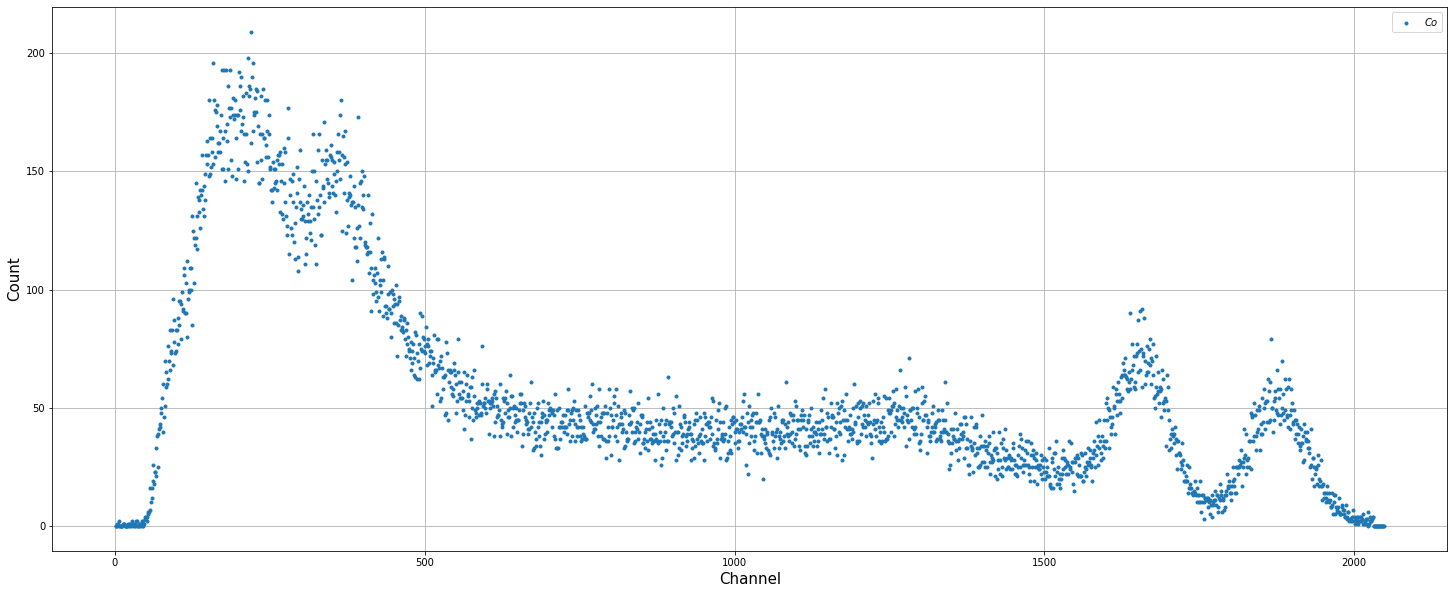

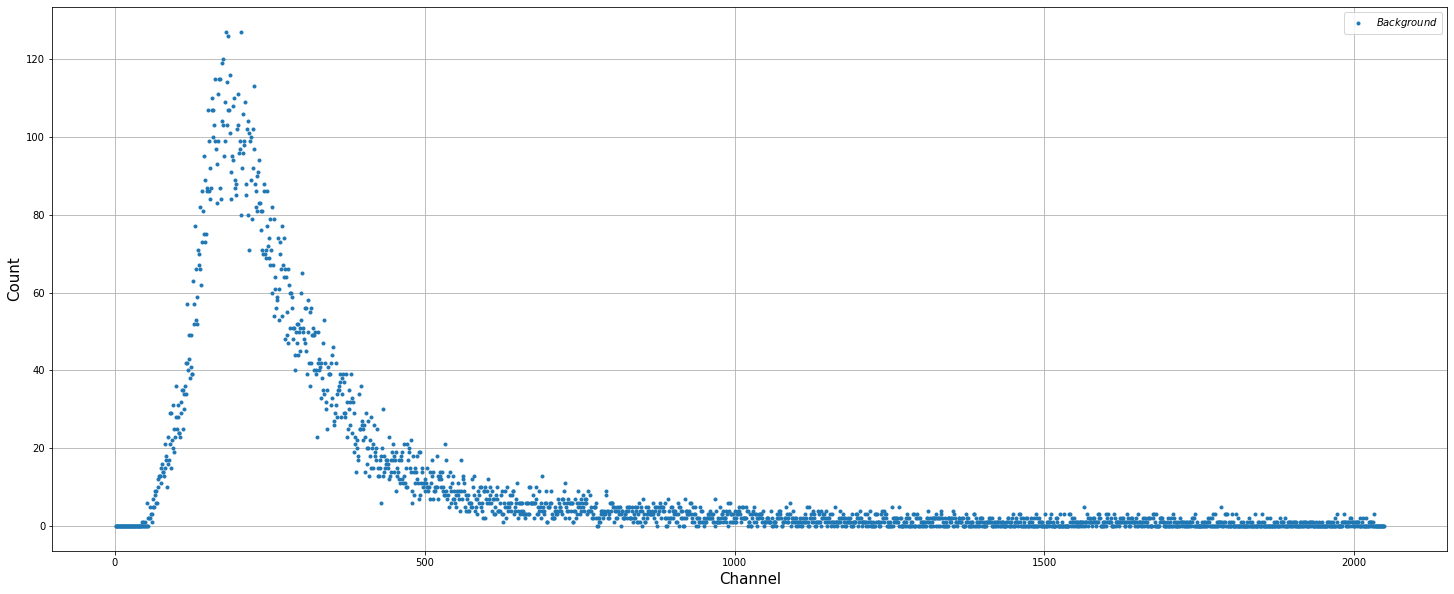

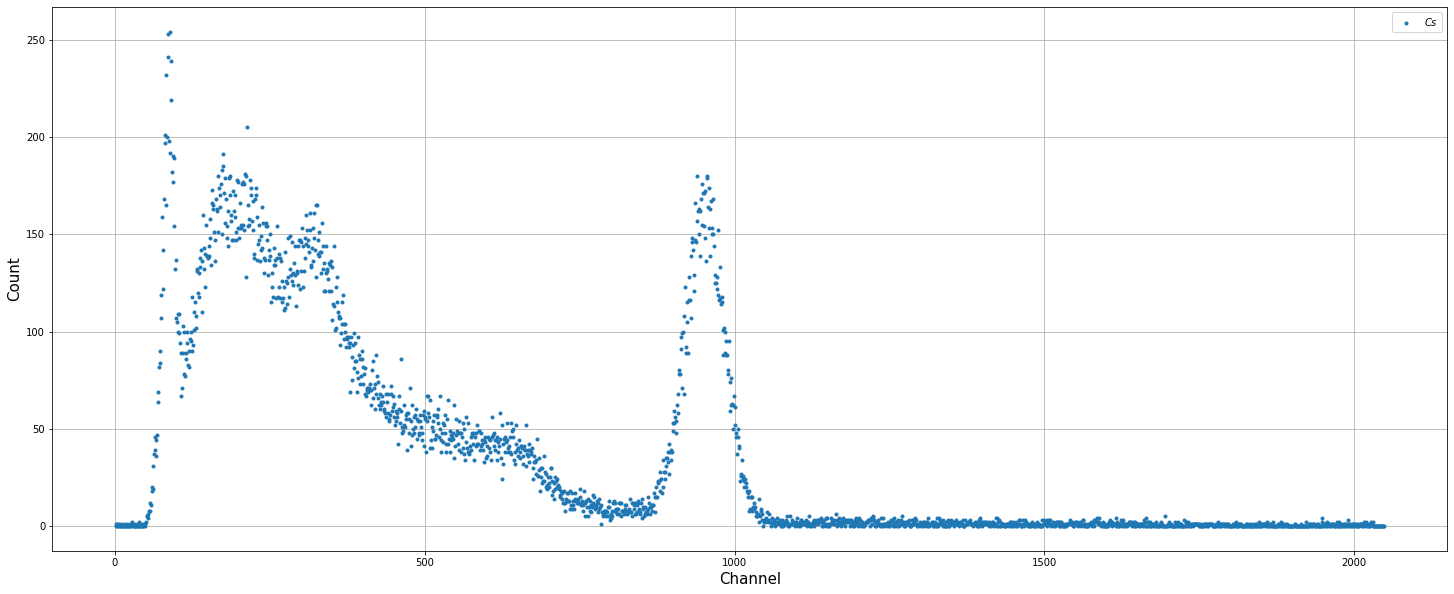

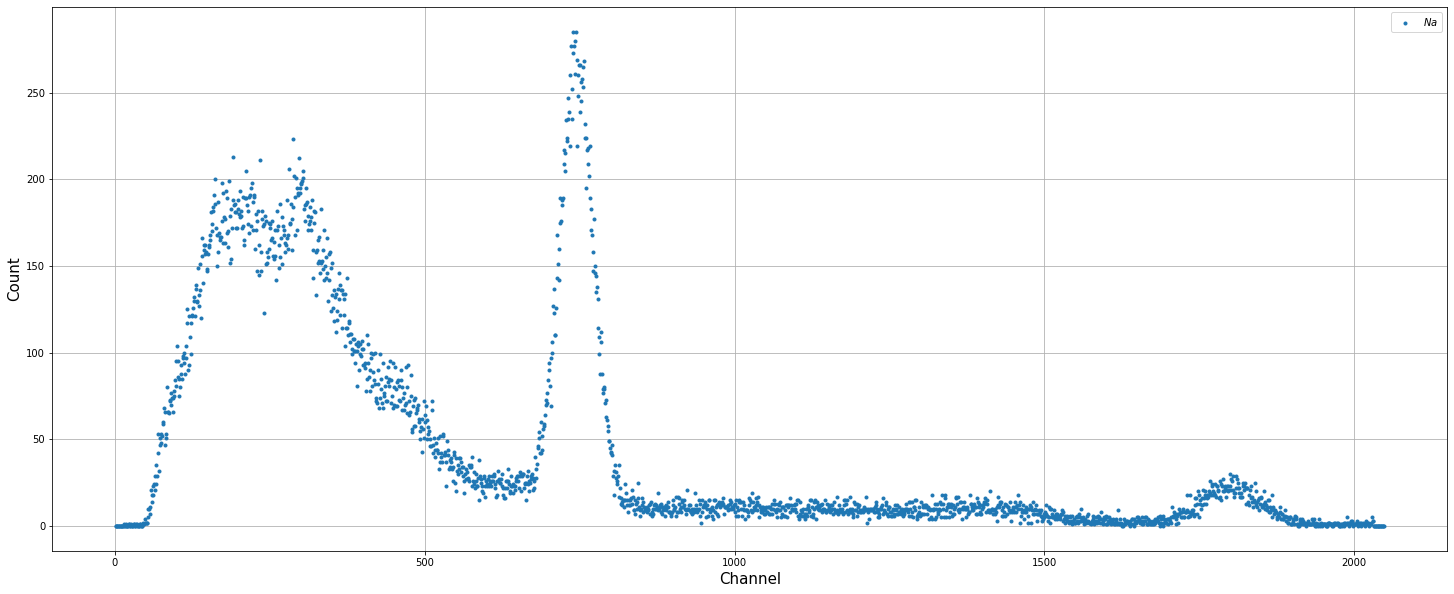

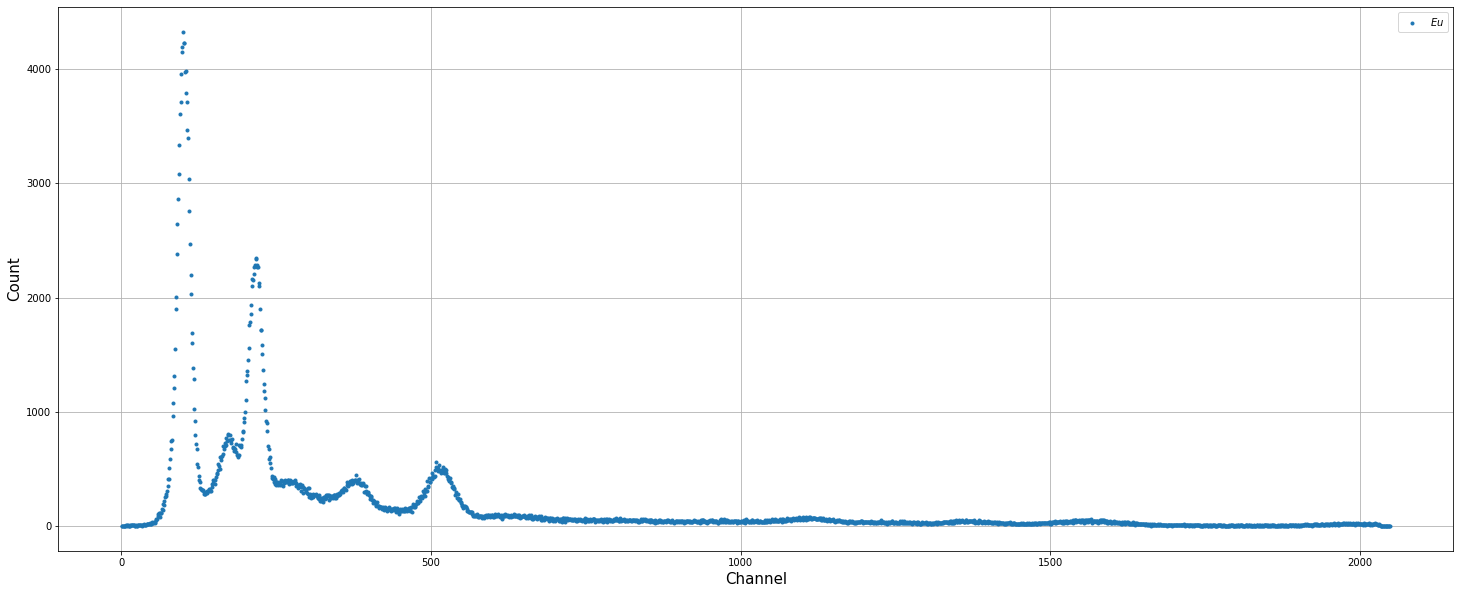

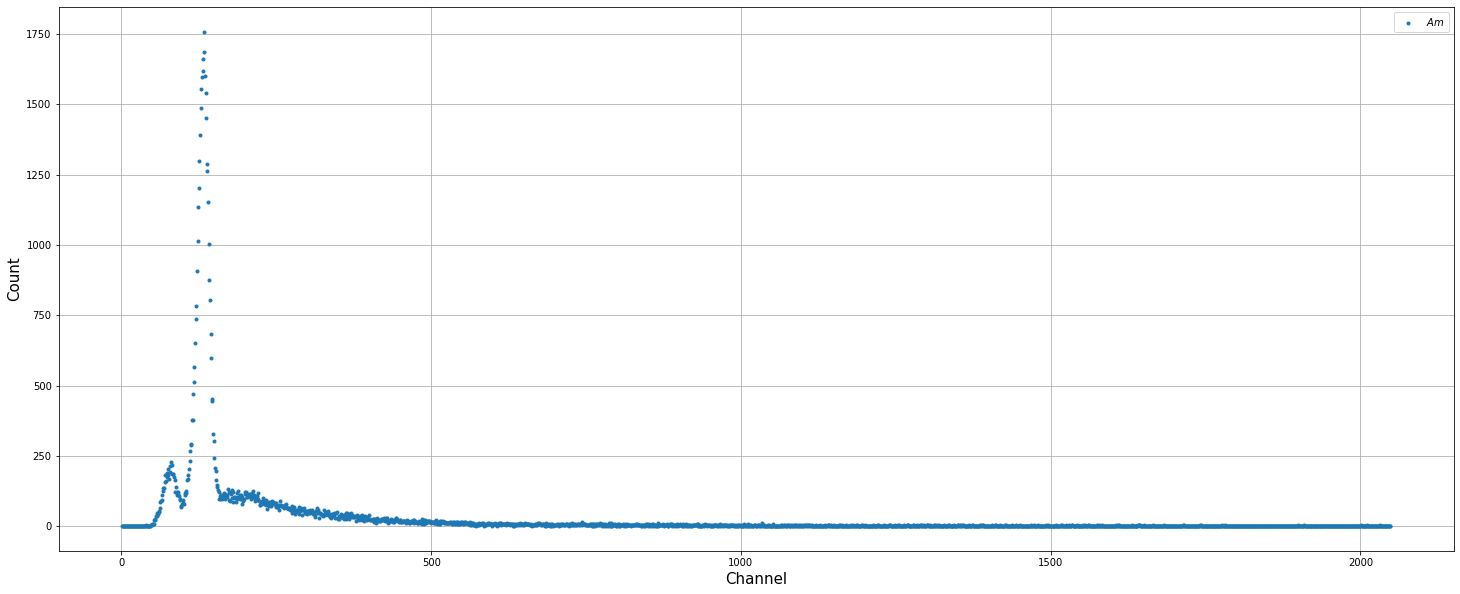

In [137]:
for frame in frames.values():
  fsz = 15
  axes = frame.plot(figsize=(25, 10), grid=True, style='.')
  axes.set_ylabel('Count', fontsize=fsz)
  axes.set_xlabel('Channel', fontsize=fsz)

In [164]:
frames.keys()

dict_keys(['src/csv/Co.csv', 'src/csv/Background.csv', 'src/csv/Cs.csv', 'src/csv/Na.csv', 'src/csv/Eu.csv', 'src/csv/Am.csv'])

In [183]:
Na_maxs = [0, 0]
Cs_max = 0
back_name = f"src/csv/Background.csv"
back_fr_name = 'Background'
for name in ["Na.csv", "Cs.csv"]:
  pathname = f"src/csv/{name}"
  if name == 'Na.csv':
    mx = 0
    mx2 = 0
    for i in range(500, 1000): # find first max
      tmp1 = frames[pathname]["$Na$"][i]
      if tmp1 > mx:
        mx = tmp1
        Na_maxs[0] = i
      tmp2 = frames[pathname]["$Na$"][i + 1000]
      if tmp2 > mx2:
        mx2 = tmp2
        Na_maxs[1] = i + 1000
  else:
    mx = 0
    mx2 = 0
    for i in range(500, 1000): # find first max
      tmp1 = frames[pathname]['$Cs$'][i]
      if tmp1 > mx:
        mx = tmp1
        Cs_max = i

a = 0.7183795712484237 +- 0.003814627994940087 kEv
b = -17.320302648171094 +- 4.75998731576963 kEv


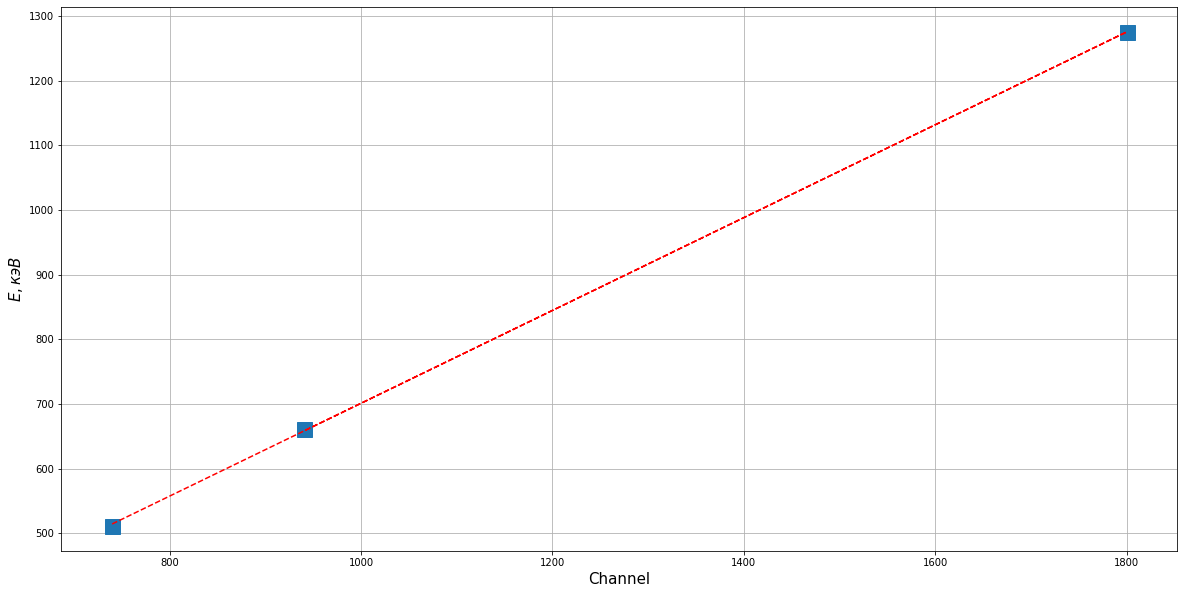

In [234]:
maxes = np.array([*Na_maxs, Cs_max])
energies = np.array([511, 1275, 662]) # keV
trend = np.poly1d(np.polyfit(maxes, energies, 1))

plt.figure(figsize=[20, 10])
plt.plot(maxes, energies, 's', markersize=15)
plt.plot(maxes, trend(maxes), 'r--')
plt.xlabel('Channel', fontsize=fsz)
plt.ylabel('$E, кэВ$', fontsize=fsz)
plt.grid()
'y = ax + b'
a = trend[1]
b = trend[0]
da = 1 / np.sqrt(3) * np.sqrt(
  (np.mean(energies * energies) - np.mean(energies) ** 2) / 
  (np.mean(maxes * maxes) - np.mean(maxes) ** 2) 
  - a * a
)
db = da * np.sqrt(np.mean(maxes * maxes))
print(f'a = {a} +- {da} kEv')
print(f'b = {b} +- {db} kEv')